In [1]:
# Enable automatic import reloading
%load_ext autoreload
%autoreload 2

# Display outputs from all lines when they exist
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # "last"

In [2]:
import numpy as np
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

import triadicsim

In [30]:
def get_community_sizes(G):
    return [len(x) for x in community.label_propagation.label_propagation_communities(G)]

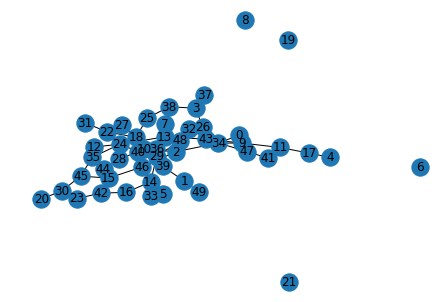

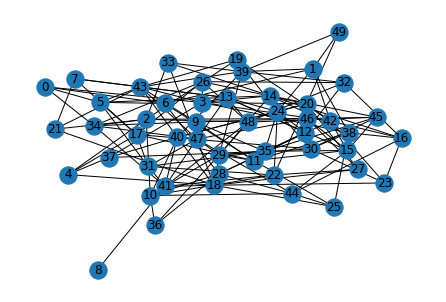

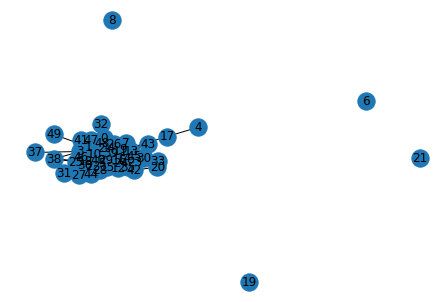

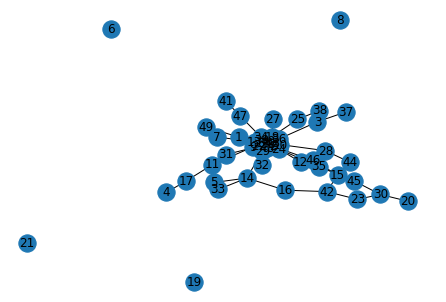

In [43]:
# Create a Gnp graph
orig_G = triadicsim.graph(
    num_nodes=50, 
    graph_type='Gnp', 
    params={'p':0.05},
)
nx.draw(orig_G, with_labels=True)
plt.savefig("fig/communities_orig")
plt.show()

closure_rate=1
rng_seed=0
rounds = 100


# Random
rand_G = orig_G.copy()
closure_type="random"
for _ in range(rounds):
    newly_added_edges = triadicsim.closure_round(
                    rand_G, closure_rate, method=closure_type, rng_seed=rng_seed)
nx.draw(rand_G, with_labels=True)
plt.savefig("fig/communities_random")
plt.show()

# Weighted
weighted_G = orig_G.copy()
closure_type="weighted_random"
for _ in range(rounds):
    newly_added_edges = triadicsim.closure_round(
                    weighted_G, closure_rate, method=closure_type, rng_seed=rng_seed)
nx.draw(weighted_G, with_labels=True)
plt.savefig("fig/communities_weighted_random")
plt.show()

# Max
max_G = orig_G.copy()
closure_type="max"
for _ in range(rounds):
    newly_added_edges = triadicsim.closure_round(
                    max_G, closure_rate, method=closure_type, rng_seed=rng_seed)
nx.draw(max_G, with_labels=True)
plt.savefig("fig/communities_max")
plt.show()


In [44]:
get_community_sizes(orig_G)
get_community_sizes(rand_G)
get_community_sizes(weighted_G)
get_community_sizes(max_G)

[9, 2, 3, 3, 3, 1, 3, 1, 11, 5, 5, 1, 1, 2]

[50]

[18, 26, 2, 1, 1, 1, 1]

[22, 4, 3, 3, 1, 1, 5, 5, 1, 1, 2, 2]